In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
train = pd.read_csv("Train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
test = pd.read_csv("Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [18]:
train["Type"] = "train"
test["Type"] = "test"

In [97]:
data = pd.concat([train,test],ignore_index=True)

c:\users\chatterjee\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [98]:
print(data.shape)
print(train.shape)
print(test.shape)

(14204, 13)
(8523, 13)
(5681, 12)


In [99]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [100]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Type                            0
dtype: int64

In [101]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


c:\users\chatterjee\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


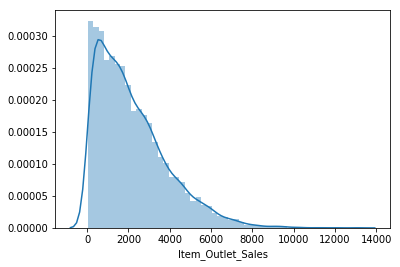

In [102]:
sns.distplot(train["Item_Outlet_Sales"])

In [103]:
data.columns

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],
      dtype='object')

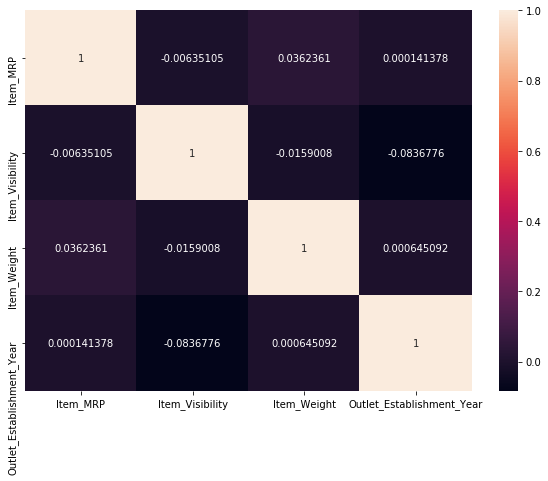

In [104]:
heat=data.copy()
heat.drop(['Item_Fat_Content', 'Item_Identifier', 'Item_Outlet_Sales',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],axis=1,inplace=True)
# heat = data['Item_MRP','Item_Visibility','Item_Weight','Outlet_Establishment_Year']
plt.figure(figsize=(10,7))
sns.heatmap(heat.corr(),annot=True,fmt='g')

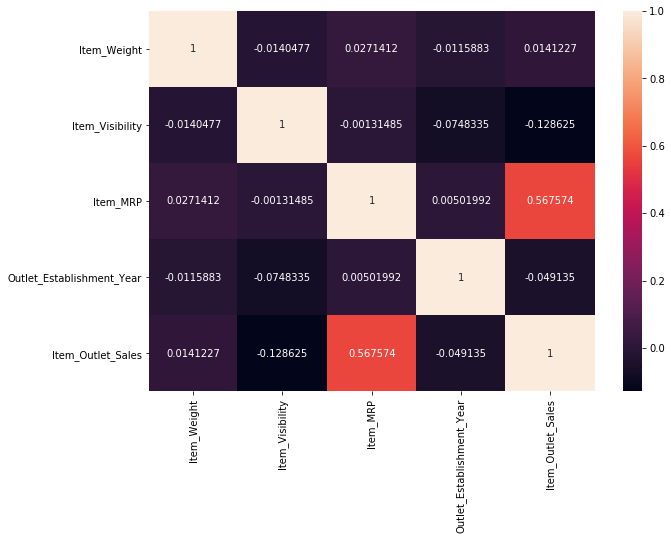

In [105]:
heat=train.copy()
heat.drop(['Item_Fat_Content', 'Item_Identifier',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type'],axis=1,inplace=True)
# heat = data['Item_MRP','Item_Visibility','Item_Weight','Outlet_Establishment_Year']
plt.figure(figsize=(10,7))
sns.heatmap(heat.corr(),annot=True,fmt='g')

In [106]:
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].value_counts().index[0])

In [107]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
Type                            0
dtype: int64

In [108]:
# print(data["Outlet_Size"])

In [109]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [110]:
attributes = ['Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Type']

for col in attributes:
    print(data[col].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Supermarket Type1    9

In [111]:
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({
    "Low Fat":"LF",
    "Regular":"R",
    "reg": "R",
    "low fat":"LF"
})

In [112]:
data["Item_Fat_Content"].value_counts()

LF    9185
R     5019
Name: Item_Fat_Content, dtype: int64

In [113]:
#Get the first two characters of ID:
data["Item_Identifier"] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data["Item_Identifier"] = data['Item_Identifier'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Identifier'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [114]:
data.drop(["Item_Type"],axis=1,inplace=True)

In [115]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
0,LF,Food,249.8092,3735.1380,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,R,Drinks,48.2692,443.4228,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,LF,Food,141.6180,2097.2700,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,R,Food,182.0950,732.3800,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,LF,Non-Consumable,53.8614,994.7052,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [116]:
data["Outlet_Establishment_Year"] = 2013 - data["Outlet_Establishment_Year"]

In [117]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ["Item_MRP", "Item_Outlet_Sales", "Item_Weight", "Outlet_Establishment_Year"]

features_log_minmax_transform = pd.DataFrame(data)
features_log_minmax_transform[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
features_log_minmax_transform.head(n = 5)

c:\users\chatterjee\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
0,LF,Food,0.927507,0.283587,0.016047,0.282525,0.416667,OUT049,Tier 1,Medium,Supermarket Type1,train
1,R,Drinks,0.072068,0.031419,0.019278,0.081274,0.000000,OUT018,Tier 3,Medium,Supermarket Type2,train
2,LF,Food,0.468288,0.158115,0.016760,0.770765,0.416667,OUT049,Tier 1,Medium,Supermarket Type1,train
3,R,Food,0.640093,0.053555,0.000000,0.871986,0.458333,OUT010,Tier 3,Medium,Grocery Store,train
4,LF,Non-Consumable,0.095805,0.073651,0.000000,0.260494,0.916667,OUT013,Tier 3,High,Supermarket Type1,train


In [118]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type
0,LF,Food,0.927507,0.283587,0.016047,0.282525,0.416667,OUT049,Tier 1,Medium,Supermarket Type1,train
1,R,Drinks,0.072068,0.031419,0.019278,0.081274,0.000000,OUT018,Tier 3,Medium,Supermarket Type2,train
2,LF,Food,0.468288,0.158115,0.016760,0.770765,0.416667,OUT049,Tier 1,Medium,Supermarket Type1,train
3,R,Food,0.640093,0.053555,0.000000,0.871986,0.458333,OUT010,Tier 3,Medium,Grocery Store,train
4,LF,Non-Consumable,0.095805,0.073651,0.000000,0.260494,0.916667,OUT013,Tier 3,High,Supermarket Type1,train


In [119]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    

In [120]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Type,Outlet
0,0,Food,0.927507,0.283587,0.016047,0.282525,0.416667,OUT049,0,1,1,train,9
1,1,Drinks,0.072068,0.031419,0.019278,0.081274,0.000000,OUT018,2,1,2,train,3
2,0,Food,0.468288,0.158115,0.016760,0.770765,0.416667,OUT049,0,1,1,train,9
3,1,Food,0.640093,0.053555,0.000000,0.871986,0.458333,OUT010,2,1,0,train,0
4,0,Non-Consumable,0.095805,0.073651,0.000000,0.260494,0.916667,OUT013,2,0,1,train,1


In [121]:
data.drop(["Outlet_Identifier","Item_Identifier"],axis=1,inplace=True)

In [122]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet'])

In [123]:
data.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Type,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.927507,0.283587,0.016047,0.282525,0.416667,train,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.072068,0.031419,0.019278,0.081274,0.000000,train,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.468288,0.158115,0.016760,0.770765,0.416667,train,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.640093,0.053555,0.000000,0.871986,0.458333,train,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.095805,0.073651,0.000000,0.260494,0.916667,train,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [145]:
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
#from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [148]:
XCols = ['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Type', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9']

YCols = ["Item_Outlet_Sales"]

In [149]:
XX = data.loc[data["Type"]=="train",XCols]
yy = data.loc[data["Type"]=="train",YCols]

# XX.drop(["Type"],axis=1,inplace=True)
# yy.drop(["Type"],axis=1,inplace=True)
print(XX.shape)
print(yy.shape)
XX.head()

(8523, 27)
(8523, 1)


,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Type,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.927507,0.016047,0.282525,0.416667,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.072068,0.019278,0.081274,0.000000,train,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.468288,0.016760,0.770765,0.416667,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.640093,0.000000,0.871986,0.458333,train,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0.095805,0.000000,0.260494,0.916667,train,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [150]:
XX.drop(["Type"],axis=1,inplace=True)
# yy.drop(["Type"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

In [147]:
model_factory = [
 RandomForestRegressor(),
 XGBRegressor(nthread=1),
 #MLPRegressor(),
 Ridge(),
 BayesianRidge(),
 ExtraTreesRegressor(),
 ElasticNet(),
 KNeighborsRegressor(),
 GradientBoostingRegressor()
]

for model in model_factory:
 model.seed = 42
 num_folds = 3

scores = cross_val_score(model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')
score_description = " %0.2f (+/- %0.2f)" % (np.sqrt(scores.mean()*-1), scores.std() * 2)

print('{model:25} CV-5 RMSE: {score}'.format(
 model=model.__class__.__name__,
 score=score_description
 ))

NameError: name 'X_train' is not defined

In [124]:
data.columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Type', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [125]:
XCols = ['Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year', 'Type', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9']

YCols = ["Item_Outlet_Sales"]

In [126]:
XX = data.loc[data["Type"]=="train",XCols]
yy = data.loc[data["Type"]=="train",YCols]

# XX.drop(["Type"],axis=1,inplace=True)
# yy.drop(["Type"],axis=1,inplace=True)
print(XX.shape)
print(yy.shape)
XX.head()

(8523, 27)
(8523, 1)


,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Type,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.927507,0.016047,0.282525,0.416667,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.072068,0.019278,0.081274,0.000000,train,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0.468288,0.016760,0.770765,0.416667,train,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.640093,0.000000,0.871986,0.458333,train,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0.095805,0.000000,0.260494,0.916667,train,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [127]:
XX.drop(["Type"],axis=1,inplace=True)
# yy.drop(["Type"],axis=1,inplace=True)

In [128]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

In [129]:
import xgboost

In [130]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [131]:
xgb.fit(XX_train,yy_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [132]:
predict = xgb.predict(XX_test)

In [133]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yy_test, predict))

0.007506495880918547


In [134]:
from sklearn.metrics import r2_score
r2_score(yy_test, predict)

0.5559534052721523

In [135]:
Sales_Predict = data.loc[data["Type"]=="test",XCols]
Sales_Predict.head()


,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Type,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,0.325012,0.007565,0.964275,0.416667,test,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,0.237819,0.038428,0.222983,0.083333,test,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8525,0.893316,0.099575,0.598095,0.458333,test,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8526,0.525233,0.015388,0.164335,0.083333,test,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8527,0.861381,0.118599,0.490494,1.000000,test,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [136]:
Sales_Predict.drop(["Type"],axis=1,inplace=True)

In [137]:
XGB_prediction = xgb.predict(Sales_Predict)

In [138]:
Data_Predicted = test.copy()

In [139]:
Data_Predicted.drop(["Item_Weight",'Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Type'],axis=1,inplace=True)

In [140]:
# print(pd.Series(Regression_prediction))
print(Data_Predicted["Item_MRP"].shape)
XGB = XGB_prediction.flatten()
print(XGB.shape)

(5681,)
(5681,)


In [141]:
Data_Predicted["XGB_Prediction"] = pd.Series(XGB) * Data_Predicted["Item_MRP"]

In [142]:
Data_Predicted["Item_Outlet_Sales"] = Data_Predicted["XGB_Prediction"]

In [143]:
Data_Predicted.drop(["Item_MRP","XGB_Prediction"],axis=1,inplace=True)

In [144]:
Data_Predicted.to_csv("XGB1.csv", index=False)